In [1]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data
data = pd.read_csv('Loan-Approval-Prediction.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Setting the Loan_ID as index

data = data.set_index("Loan_ID")
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002741,Female,Yes,1,Graduate,No,4608,2845.0,140.0,180.0,1.0,Semiurban,Y
LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
LP001570,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
LP002367,Female,No,1,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural,N
LP002740,Male,Yes,3+,Graduate,No,6417,0.0,157.0,180.0,1.0,Rural,Y


In [4]:
# Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


Obs - The no. of Rows, column are 614,12 respectively. The numerical column(5) and categorical data(7)

In [5]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0
Credit_History,564.0,NaN,NaN,NaN,0.842199,0.364878,0.0,1.0,1.0,1.0,1.0


In [6]:
# Missing values
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_na:
    print(f"{feature}: {data[feature].isnull().mean() * 100:.3f}% missing values")

Gender: 2.117% missing values
Married: 0.489% missing values
Dependents: 2.443% missing values
Self_Employed: 5.212% missing values
LoanAmount: 3.583% missing values
Loan_Amount_Term: 2.280% missing values
Credit_History: 8.143% missing values


In [7]:
# Numerical Feartures

numerical_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]
print("No. of Numerical variable:",len(numerical_feature))
data[numerical_feature].head()

No. of Numerical variable: 5


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001002,5849,0.0,NaN,360.0,1.0
LP001003,4583,1508.0,128.0,360.0,1.0
LP001005,3000,0.0,66.0,360.0,1.0
LP001006,2583,2358.0,120.0,360.0,1.0
LP001008,6000,0.0,141.0,360.0,1.0


In [8]:
# Categorical Features

categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
print("No. of Categorical Features:",len(categorical_features))
data[categorical_features].head()

No. of Categorical Features: 7


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Loan_ID,,,,,,,
LP001002,Male,No,0,Graduate,No,Urban,Y
LP001003,Male,Yes,1,Graduate,No,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
LP001008,Male,No,0,Graduate,No,Urban,Y


In [9]:
print(data["Gender"].value_counts())
print(data["Dependents"].value_counts())
print(data["Self_Employed"].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


In [10]:
print(data['Loan_Amount_Term'].nunique())
print(data['LoanAmount'].nunique())
print(data['Credit_History'].nunique())

10
203
2


In [11]:
# Filling Null Values

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [12]:
# Droping Null Values

data = data.dropna(subset = ['Gender','Dependents','Self_Employed'])
data.isnull().sum().sum()

0

The Null Values are cleaned the data

In [13]:
# Checking the duplicates in the data

print("Number of duplicates: ", data.duplicated().sum())

Number of duplicates:  0


In [14]:
data["Dependents"].value_counts()

,count
Dependents,
0,319
1,95
2,94
3+,46


In [15]:
# Fixing the column of dependents to coonvert top numeric data type

data['Dependents'] = data['Dependents'].str.replace("+","")
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [16]:
# Changing the data type from string to integer

data['Dependents'] = data['Dependents']
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [17]:
#Categorical Analysis

data.describe(include = 'object').T

,count,unique,top,freq
Gender,554,2,Male,453
Married,554,2,Yes,362
Dependents,554,4,0,319
Education,554,2,Graduate,431
Self_Employed,554,2,No,478
Property_Area,554,3,Semiurban,211
Loan_Status,554,2,Y,382


In [18]:
#Numerical Analysis

data.describe(include = ['int','float'])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,554.000000,554.000000,554.000000,554.000000,554.000000
mean,5267.059567,1585.575668,144.337545,342.346570,0.855596
std,5455.163295,2524.484889,81.136501,64.781026,0.351817
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3839.500000,1149.000000,128.000000,360.000000,1.000000
75%,5818.750000,2297.250000,166.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


In [19]:
# Correlation

data[numerical_feature].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.103279,0.511292,0.001427,-0.046793
CoapplicantIncome,-0.103279,1.000000,0.194472,-0.011450,0.004219
LoanAmount,0.511292,0.194472,1.000000,0.073711,-0.019828
Loan_Amount_Term,0.001427,-0.011450,0.073711,1.000000,0.016482
Credit_History,-0.046793,0.004219,-0.019828,0.016482,1.000000


obs - The correlation analysis reveals that ApplicantIncome and LoanAmount have a moderate positive relationship (0.505).

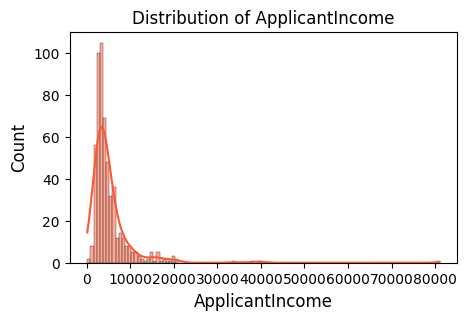

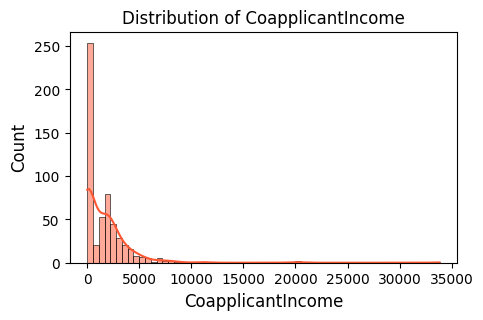

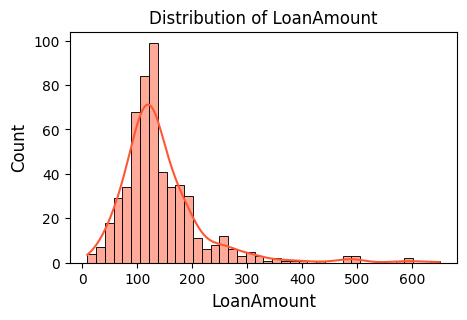

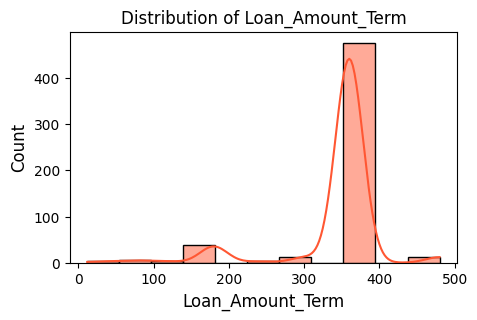

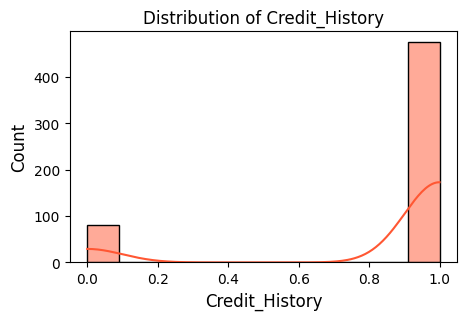

In [20]:
# Univariate Visualization for Numerical Analysis
for feature in numerical_feature:
  plt.figure(figsize = (5,3))

  #Histrogram
  sns.histplot(data[feature],kde = True,color = "#FF5733")
  plt.title(f"Distribution of {feature}")
  plt.xlabel(feature, fontsize = 12)
  plt.ylabel("Count", fontsize = 12)
  plt.show()

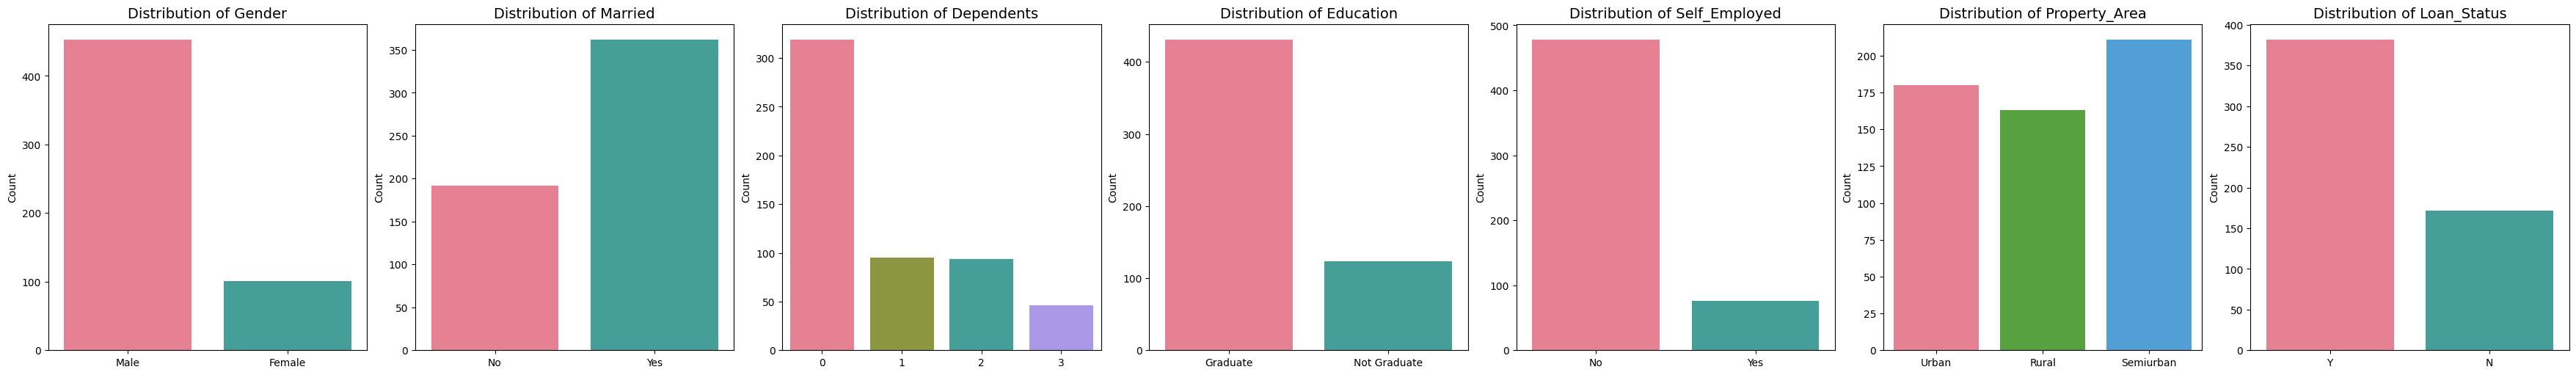

In [21]:
# Univariate Analysis of categorical features
n_features = len(categorical_features)
fig, axes = plt.subplots(nrows=1, ncols=n_features, figsize=(5 * n_features, 5), constrained_layout=True)

# Iterate through categorical features and create a bar plot for each
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, ax=axes[i], palette="husl")
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.show()

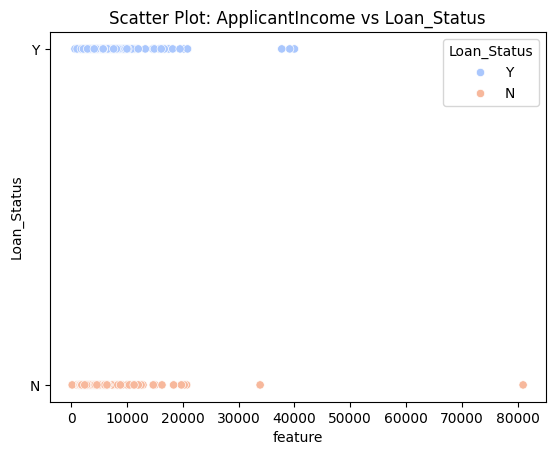

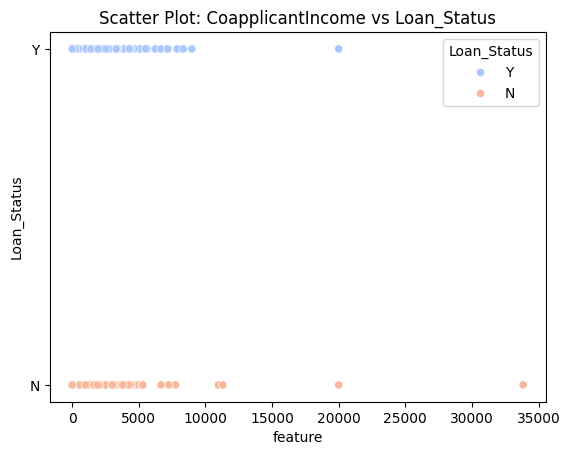

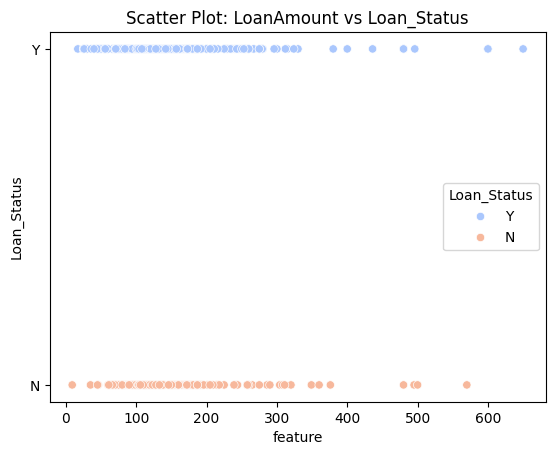

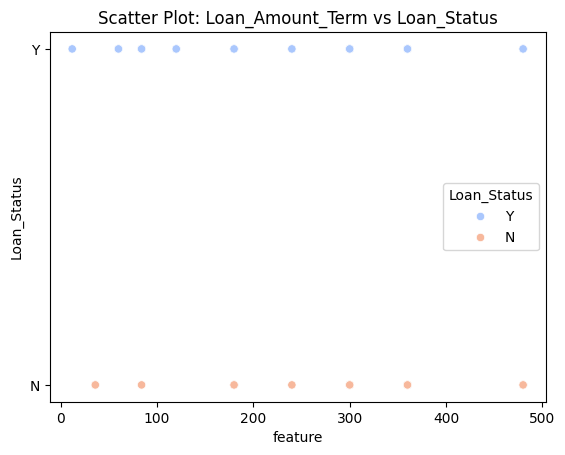

In [22]:
# Bivariate Analysis

for feature in numerical_feature:
  if feature != 'Credit_History':   #Independent Features
      sns.scatterplot(data = data,x=feature,y='Loan_Status',hue = 'Loan_Status', palette='coolwarm')
      plt.title(f'Scatter Plot: {feature} vs Loan_Status')
      plt.xlabel('feature',fontsize = 10)
      plt.ylabel('Loan_Status',fontsize = 10)
      plt.show()

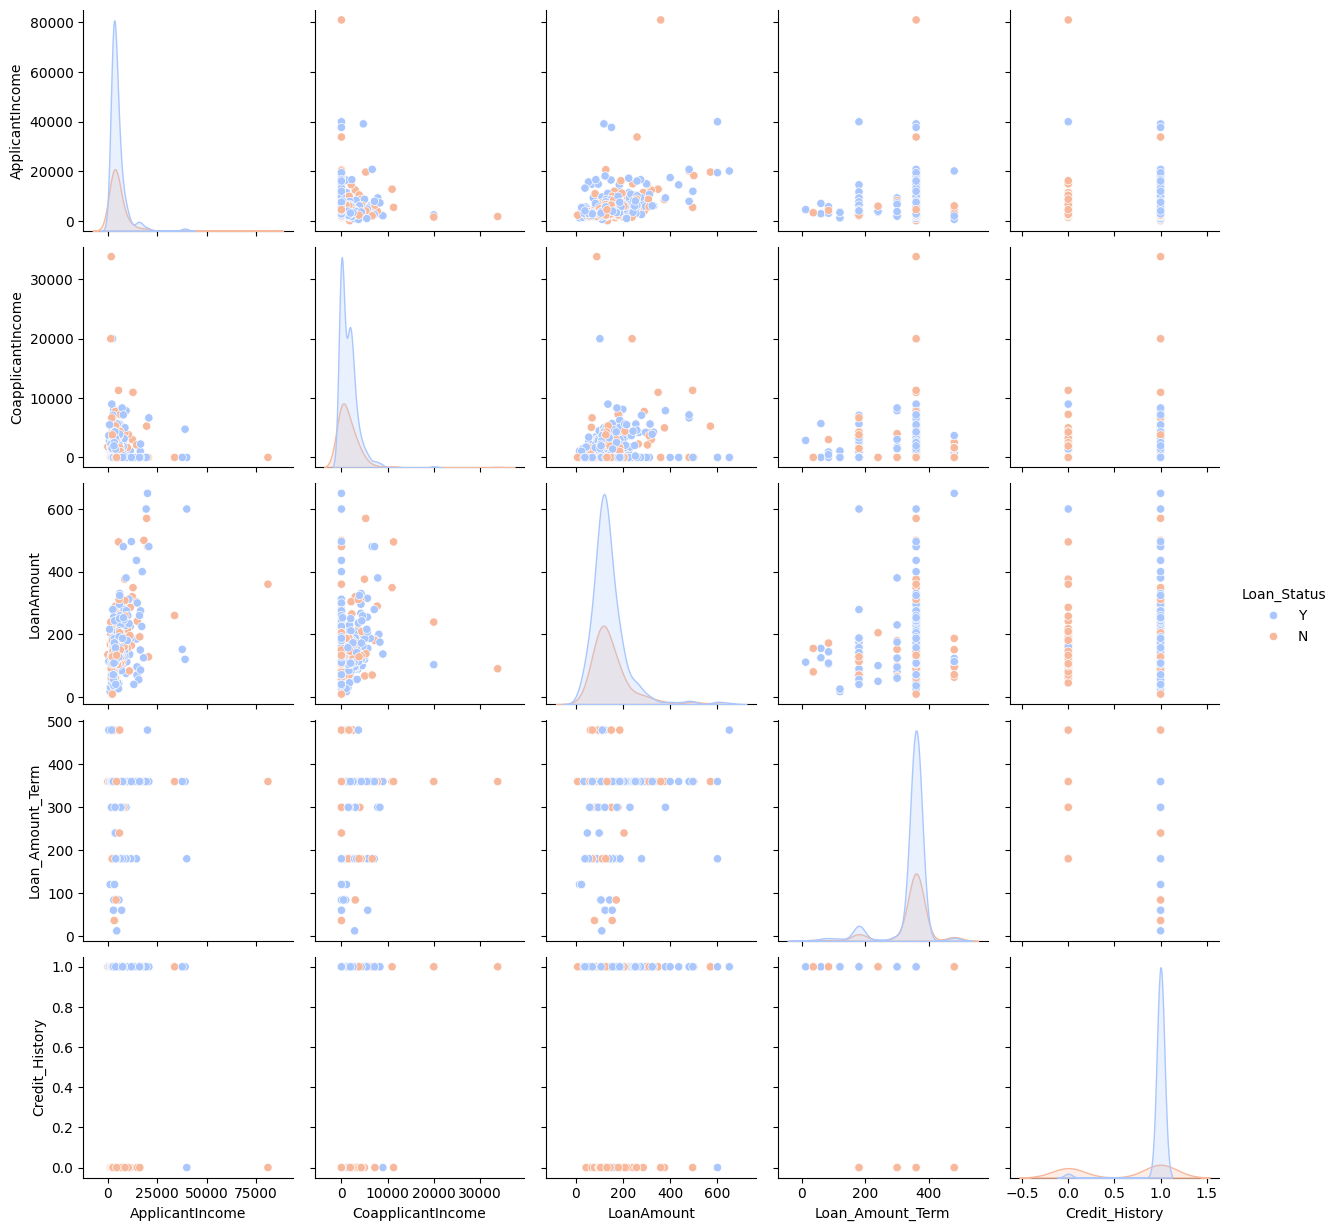

In [23]:
sns.pairplot(data,hue = 'Loan_Status',palette = 'coolwarm')
plt.show()

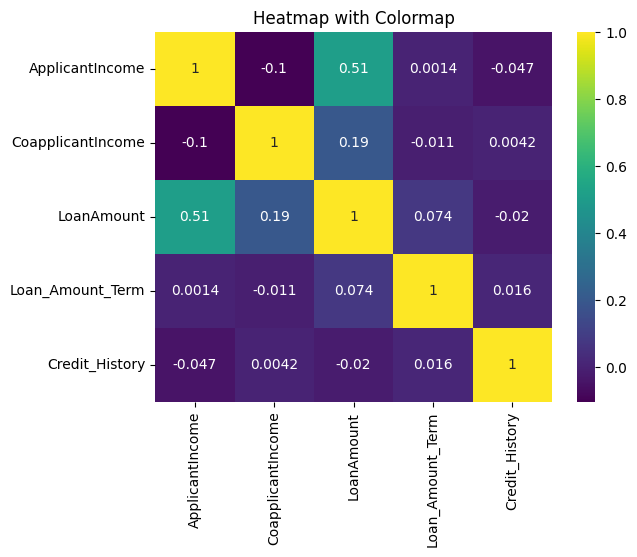

In [24]:
sns.heatmap(data[numerical_feature].corr(), annot = True, cmap = 'viridis')
plt.title("Heatmap with Colormap")
plt.show()

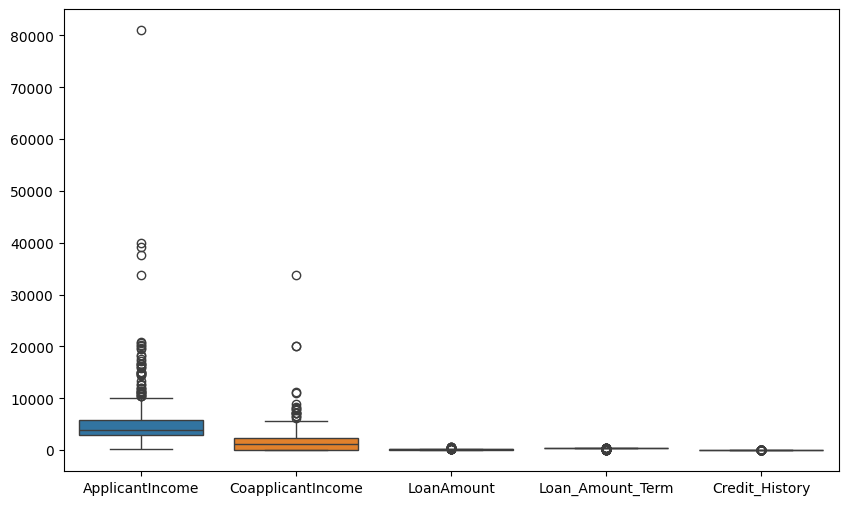

In [25]:
# Outlier
plt.figure(figsize = (10,6))
sns.boxplot(data[numerical_feature])
plt.show()

In [26]:
def IQR(z):
  Q1 = z.quantile(0.25)
  Q3 = z.quantile(0.75)
  IQR = Q3 - Q1
  return IQR

Num_iqr = IQR(data[numerical_feature])
Num_iqr

,0
ApplicantIncome,2975.00
CoapplicantIncome,2297.25
LoanAmount,66.75
Loan_Amount_Term,0.00
Credit_History,0.00


In [27]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [28]:
# Splitting the data
X = data.drop('Loan_Status',axis = 1)
y = data['Loan_Status']

In [29]:
print(X.shape)
print(y.shape)

(554, 11)
(554,)


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(443, 11)
(111, 11)
(443,)
(111,)


In [31]:
data.nunique()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,463
CoapplicantIncome,270
LoanAmount,194
Loan_Amount_Term,10
Credit_History,2


In [38]:
X_train.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP002211,Male,Yes,0,Graduate,No,4817,923.0,120.0,180.0,1.0,Urban
LP002141,Male,Yes,3,Graduate,No,2666,2083.0,95.0,360.0,1.0,Rural
LP001859,Male,Yes,0,Graduate,No,14683,2100.0,304.0,360.0,1.0,Rural


In [32]:
# Label Encoding

le = LabelEncoder()
Y_le_train = le.fit_transform(y_train)
y_le_test = le.transform(y_test)
print(Y_le_train)

[1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0
 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0]


In [39]:
ct = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop = "first"),[0,1,3,4,10])],remainder = 'passthrough')

In [41]:
X_train_ct = ct.fit_transform(X_train)

In [42]:
X_test_ct = ct.transform(X_test)

In [43]:
scaler = StandardScaler()
X_train_ct = scaler.fit_transform(X_train_ct)
X_test_ct = scaler.transform(X_test_ct)

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train_ct,Y_le_train)

LogisticRegression()

In [45]:
pred_log_reg = log_reg.predict(X_test_ct)
pred_log_reg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1])

In [46]:
# Accuracy

accuracy = accuracy_score(y_le_test,pred_log_reg)
accuracy

0.8198198198198198

In [47]:
# confusion matrix

con_max = confusion_matrix(y_le_test,pred_log_reg)
con_max

array([[12, 19],
       [ 1, 79]])

In [48]:
#Classification report

print("Classification Report:")
print(classification_report(y_le_test,pred_log_reg))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.81      0.99      0.89        80

    accuracy                           0.82       111
   macro avg       0.86      0.69      0.72       111
weighted avg       0.84      0.82      0.79       111



In [51]:
true_positive = con_max[0][0]
false_positive = con_max[0][1]
false_negative = con_max[1][0]
true_negative = con_max[1][1]

In [52]:
# Breaking down the formula for Accuracy
Acc_for = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Acc_for

0.8198198198198198

In [53]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.3870967741935484

In [54]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9230769230769231

In [55]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.5454545454545454

In [56]:
# Area Under Curve
auc = roc_auc_score(y_le_test,pred_log_reg)
auc

0.6872983870967742

In [57]:
fpr,tpr,thresholds = roc_curve(y_le_test,pred_log_reg)

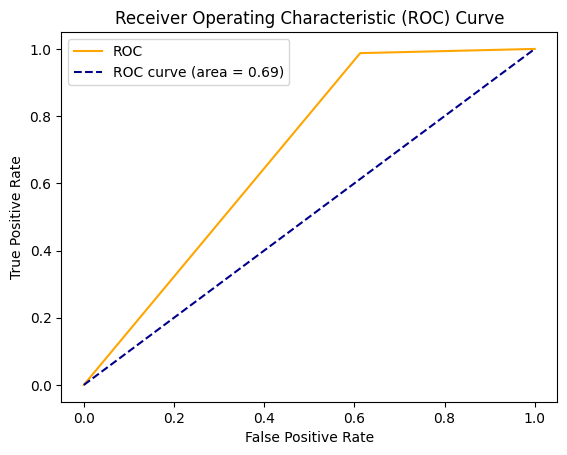

In [60]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [61]:
# Hyperparameter Tuning with cross-validation

parms = {'penalty':('l1','l2','elastic'),'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [62]:
#Grid Search CV

from sklearn.model_selection import GridSearchCV

In [63]:
grid_cv = GridSearchCV(log_reg,parms,cv = 5)
grid_cv.fit(X_train_ct,Y_le_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ('l1', 'l2', 'elastic')})

In [64]:
grid_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [66]:
grid_cv.best_score_

0.8060265577119511

In [67]:
#Liblinear solver

gridsearchcv = LogisticRegression(C=0.1 , penalty='l2' , solver="liblinear")
gridsearchcv.fit(X_train_ct,Y_le_train)
gridsearchcv_y_pred = log_reg.predict(X_test_ct)
print(confusion_matrix(y_le_test , gridsearchcv_y_pred))
print(accuracy_score(y_le_test, gridsearchcv_y_pred))
print(classification_report(y_le_test , gridsearchcv_y_pred))

[[12 19]
 [ 1 79]]
0.8198198198198198
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.81      0.99      0.89        80

    accuracy                           0.82       111
   macro avg       0.86      0.69      0.72       111
weighted avg       0.84      0.82      0.79       111



In [69]:
# ‘newton-cg’ solver

gridsearchcv = LogisticRegression(C=0.1 , penalty='l2' , solver="newton-cg", verbose = 0)
gridsearchcv.fit(X_train_ct,Y_le_train)
gridsearchcv_y_pred = log_reg.predict(X_test_ct)
print(confusion_matrix(y_le_test , gridsearchcv_y_pred))
print(accuracy_score(y_le_test, gridsearchcv_y_pred))
print(classification_report(y_le_test , gridsearchcv_y_pred))

[[12 19]
 [ 1 79]]
0.8198198198198198
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.81      0.99      0.89        80

    accuracy                           0.82       111
   macro avg       0.86      0.69      0.72       111
weighted avg       0.84      0.82      0.79       111



The model achieves an overall accuracy of 81.98%, indicating good performance but with room for improvement.